In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [6]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


##Importing the data as Pandas Frame Work

In [7]:
df=pd.read_csv("data\StudentsPerformance.csv")

In [8]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##Preparing X and Y Variables

In [9]:
##Here We'll try to [predict the maths score]

X = df.drop(columns=['math score'], axis=1)
y = df['math score']

##Create Column Transformer with 3 types of Transformers

In [10]:
num_features=X.select_dtypes(exclude='object').columns
cat_featutres=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer([
    ('OneHotEncoder',OneHotEncoder(),cat_featutres),
    ('StandardScaler',StandardScaler(),num_features)
]
)

In [11]:
X=preprocessor.fit_transform(X)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

##Create an Evaluate Function to give all metrics after model training

In [13]:
def evaluate_model(true,predict):
  mae=mean_absolute_error(true,predict)
  mse=mean_squared_error(true,predict)
  rmse=np.sqrt(mean_squared_error(true,predict))
  r2_square=r2_score(true,predict)
  return mae,rmse,r2_square

In [14]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'KNeighboursRegressor':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoostRegressor':CatBoostRegressor(verbose=False),
    'AdaBoostRegressor':AdaBoostRegressor()
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train,y_train)

  ##MAke Prediction
  y_train_pred=model.predict(X_train)
  y_test_pred=model.predict(X_test)


  ##Evaluating the train and test data with the metricesss part
  model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
  model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)


  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])
  print('Model performance for Training set')
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("- R2 Score: {:.4f}".format(model_train_r2))

  print('----------------------------------')

  print('Model performance for Test set')
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("- R2 Score: {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)

  print('='*35)
  print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.3402
- Mean Absolute Error: 4.2723
- R2 Score: 0.8735
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4214
- Mean Absolute Error: 4.2253
- R2 Score: 0.8792


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


KNeighboursRegressor
Model performance for Training set
- Root Mean Squared Error: 5.7091
- Mean Absolute Error: 4.5175
- R2 Score: 0.8554
-------------------------

##Difference between the Predicted and the actual value

In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.6250,14.3750
737,53,59.3750,-6.3750
740,80,76.5000,3.5000
660,74,76.2500,-2.2500
411,84,87.4375,-3.4375
...,...,...,...
408,52,43.8750,8.1250
332,62,62.6250,-0.6250
208,74,67.9375,6.0625
613,65,67.2500,-2.2500


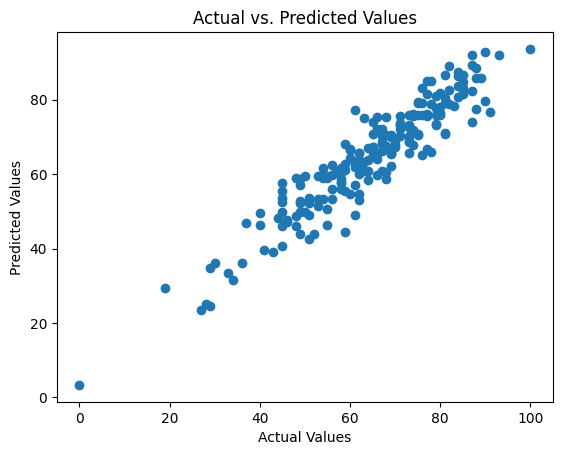

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()